In [386]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats as st
import random
%matplotlib inline

In [390]:
class HypotesisTest(object):

    def __init__(self, data):
        self.data = data
        self.make_model()
        self.current = self.test_statistic(data)

    def make_model(self):
        pass

    def p_value(self, iters=1000):
        total = 0
        for _ in range(iters):
            simulated_model = self.run_model()
            if self.test_statistic(simulated_model) > self.current:
                total += 1
        return 1.0*total/iters

## Z-Test

-The reason we are using a Z test instead of a T-test like we do in the later examples is that the standard deviation of the population is provided for us, and we expect that our sample matches the population.

- Formula: Z = (x̄ - u0)/ (σ/sqrt(n))
- x̄ ​is the sample mean  
- u0 ​is the population mean  
- σ  ​is the population standard deviation
- n ​is the test sample size

Since the problem asks us to conclude if we are greater than the average, not just different than the average, we will use a 1 tailed Z value. 1 tailed vs 2 tailed is shown graphically below.


In [206]:
def hyp_test(mu_pop, std_pop, mu_sample, sample_size):
    std_sample = std_pop/np.sqrt(sample_size)
    z = (mu_pop - mu_sample)/std_sample    
    p_value = st.norm.cdf(z)
    return p_value

hyp_test(26.5,10, 24, 50)

0.9614500641282292

### Doing A T-Test, Which Is Slightly Different Than A Z Test
Let’s do another example that has one big difference from the first one.  That difference is that the standard deviation of the population is not provided. In real life, this will probably be more common.
In addition to calculating your own standard deviation, the other big difference between a Z-test and a T-test is that all Z-tests use the standard normal distribution, and the T-test uses a different distribution that varies depending on how much data that you have, a metric known as degrees of freedom (df).

Summary of a T-test 
- In a T-test, you have to use the sample data to determine the standard deviation of the population, as opposed to it being provided  
- Because of the uncertainty in the standard deviation, the T-distribution puts more probability at the tails of the probability distribution  
- With enough data, the T-distribution exactly matches the standard normal distribution.  (i.e. you could use a T-table or a Z-table and get the same result)  
- Enough data is usually assumed to be a df somewhere between 20 and 50.  (That value is something of a judgment call.  If you want to see how T-distribution changes as you change the degrees of freedom, this online tool is useful.


## 1 Sample T-Test

You have been told that the average height of female college students in the United States is 5.5 feet.  You have measured 15 students at your college, and want to determine if the average height at your college is statistically different than the average across the U.S. Here we know the population mean, 5.5 feet, but not the population standard deviation.  We will have to derive that from our data.  (With this type of test there is an assumption that the population standard deviation is not systematically different from the data that we have. For instance, we didn't intentionally admit students based on their height in order to make a narrow distribution.)

We have 1 sample set of data.  That sample set is only 15 measurements.  We have a population mean, but not a population standard deviation.   Since we don’t have a population standard deviation, and we have fewer than 20 samples, we will want to do a T test.

These are the key points of our problem We have exactly 1 set of data. 
- We don’t have a before and after.  
- We don’t have a test group and a control group.  
- We have 1 and only 1 set of data.  We do have a population mean to calculate our difference off of
- We do not have a population standard deviation

De forma muito simular ao z-test, a formula é: Z = (x̄ - u0)/ (s/sqrt(n))
- x̄  ​is the sample mean  
- u0 ​is the population mean  
- s ​is the sample standard deviation  (Única diferença)
- n ​is the test sample size


In [250]:
sample_height = np.array([5.1, 5.2, 5.4, 5.5, 5.5, 5.6, 5.6, 5.7, 5.7, 5.8, 5.8, 5.9, 6, 6.1, 6.2])
n=len(sample_height)
s_mean = sample_height.mean()
s = sample_height.std(ddof=1) #com 15-1 graus de liberdade
s

0.3104528182847635

In [251]:
#Testando calculo de df
diff = sample_height - sample_height.mean()
np.sqrt(np.sum(diff**2)/(n-1))

0.3104528182847635

In [254]:
t = (s_mean-5.5)/s*np.sqrt(n)
pvalue_1_tail = 1-stats.t.cdf(t,df=n-1)

Pelo fato de problema só querer saber se a altura é igual, é um problema two tailed. Portanto precisamos multiplicar a probabilidade por 2.

In [255]:
pvalue_1_tail*2

0.0483873342746417

stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate')

É um two-sided test.

In [288]:
stats.ttest_1samp(sample_height, 5.5)

Ttest_1sampResult(statistic=2.162380477173991, pvalue=0.048387334274641654)

Portanto, sim, podemos dizer com confiança maior que 95% que as alturas são estatisticamente diferentes.

**Um ponto importante do t-test, é que como utilizamos df-1, o número mínimo de dados da amostra deve ser 2, ao contrario do z-test, que é 1.**

## Solving The Paired T-Test

- When You Use The Same Test Subject Multiple Times

The difference between this third example and the second example is that a mean value isn’t provided in this example.  Instead you get two sets of data representing a before and an after.  Instead of calculating the difference from the mean, we will calculate how much the “after” data set changed from the “before” data set and determine if that level of change is significant.

For instance you would use this test if

- You are making a new golf club and measure how far people can hit a golf ball with a standard club vs your new club  
- You are a high priced restaurant consultant, and you measure weekly sales in a restaurant before your visit, and after you come in to give advice and make improvements  

You would not use this analysis, and instead use a different equation if 

- You have a drug trial and give one group of people a placebo and the other group your new drug, and measure the blood pressure of both groups.  - You give 10 people your new golf clubs and 10 people your old ones and see how well each group scores on a round of golf  
- You measure the sale of restaurants you have consulted, and compare them with similar restaurants in the area that haven’t utilized your services yet


- d ​is the average of the difference between the after sample and the before sample  
- s  ​is the sample standard deviation. É o desvio padrão das diferenças!
- n ​is the test sample size. Não é a somatória dos dois grupos, é o numero de pares.
- t = d / raiz(s²/n)
- OU T = d*raiz(n)/s

In [257]:
avg_1, avg_2 = 137.95, 132.6
d = avg_2 - avg_1
s = 5.6127
n = 20

In [258]:
t = d*np.sqrt(n)/s
stats.t.cdf(t,df=n-1)

0.00021027117309136648

Podemos afirmar com mais de 99% de confiança que os participantes perderam peso

ttest_rel(a, b[, axis, nan_policy])

Calculate the t-test on TWO RELATED samples of scores, a and b.

### Paired T-Test With Non-Zero Hypothesis

- d ​is the average of the difference between the after sample and the before sample  
- s  ​is the sample standard deviation. É o desvio padrão das diferenças!
- n ​is the test sample size. Não é a somatória dos dois grupos, é o numero de pares.
- ou t = (d-u)*raiz(n)/s
- u is the hypothesized mean difference


In [259]:
avg_1, avg_2 = 137.95, 132.6
d = avg_2 - avg_1
s = 5.6127
n = 21
u = -4
t = (d-u)*np.sqrt(n)/s
stats.t.cdf(t,df=n-1)

0.14172507295339493

Não podemos concluir nada, pois é 14% de chance da diferençar acontecer ao acaso. Qual a maior diferença que podemos afirmar que com 95% de confiança

In [260]:
t = stats.t.ppf(0.05,df=n-1)
t

-1.7247182429207863

- t = (d-u)
- u = d- t/np.sqrt(n)/s

In [261]:
u = d-t/np.sqrt(n)*s
u

-3.2375796655804483

Portanto, para u = -3.238, podemos afirmar com 95% de confiaça. Ou seja, pederam em média 3.18kg. Para testar:

In [263]:
#Validando
avg_1, avg_2 = 137.95, 132.6
d = avg_2 - avg_1
s = 5.6127
n = 21
u = -3.2375796655804483
t = (d-(u))*np.sqrt(n)/s
stats.t.cdf(t,df=n-1)

0.05000000000000009

Ao invés disso, podemos calcular quantas pessoas precisariamos do teste para afirmar com 95% de confiança que o peso baixou

In [182]:
avg_1, avg_2 = 137.95, 132.6
d = avg_2 - avg_1
s = 5.6127
u = -4
n = (t*s/(d-u))**2
t = -1.7291328115213678
stats.t.cdf(t,df=n-1)
n = (t*s/(d-u))**2
n

51.6812282215952

# Two-Sample T-Tests

The final two examples are the type of statistical significance calculations you probably most commonly think of for any medicinal scientific study. In these examples, you essentially have two groups, one of which is the control and the other is the study group.

Unlike the Paired T-Tests we showed in the last example, these tests are done when the members of the population are not the same.  I.e. you aren't getting a baseline result from a person and then getting another result from the same person later.


### Solving The T-Test With Equal Variance Problem:

Hartshorn, Scott. Hypothesis Testing: A Visual Introduction To Statistical Significance (p. 81). Edição do Kindle. 
mean_1, means_2 = 1.73, 2.19

In [195]:
mean_1, mean_2 = 1.73, 2.19
s1, s2 = 0.624, 0.611
n1, n2 = 10, 12
df = n1 + n2 -2

means_diff = mean_1 - mean_2
avg_std = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2)/(n1+n2-2))
raiz_num_of_samples = np.sqrt(1/n1 + 1/n2)
t = means_diff/(avg_std*raiz_num_of_samples)
t

-1.741540891906013

In [197]:
stats.t.cdf(t,df=df)*2 # two-tailed

0.09694965482212217

Em python, existe um biblioteca pronta que faz o teste entre as duas amostras, caso a variancia seja igual, equal_var = True, senão False.

Por defalt a função calcula two tail teste, pra cacular one tail, basta dividir por 2.

scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')[source]

In [437]:
a = np.array([1.4, 2.5, 1.6, 2.3, 0.9, 1.1, 2.7, 2.1, 1.3, 1.4])
b = np.array([2.2, 3, 1.9, 2.1, 2.7, 1.6, 1.3, 3.0, 3.1, 1.9, 1.7, 1.8])

In [444]:
stats.ttest_ind(a,b, equal_var=True)

Ttest_indResult(statistic=-1.7479367565919788, pvalue=0.0958111125484402)

In [441]:
class DiffMeansPermute(HypotesisTest):

    def test_statistic(self, data):
        data1, data2 = data
        mean1 = np.mean(data1)
        mean2 = np.mean(data2)
        return abs(mean1-mean2)

    def make_model(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))
        
    def run_model(self):
       np.random.shuffle(self.pool)
       data = self.pool[:self.n], self.pool[self.n:]
       return data

In [445]:
t_test = DiffMeansPermute([a,b])
t_test.p_value(10000)

0.0892

### Example 5 - 2 Sample T-Test With Unequal Variance

Hartshorn, Scott. Hypothesis Testing: A Visual Introduction To Statistical Significance (p. 93). Edição do Kindle. 
##### t = (mean_1 - mean_2)/np.sqrt(s1**2/n1+ s2**2/n2)
##### df = (s1**2/n1+s2**2/n2)**2/((s1**2/n1)**2/(n1-1) + (s2**2/n2)**2/(n2-1))

In [199]:
mean_1, mean_2 = 13.93, 11.85
s1, s2 = 5.298, 2.444
n1, n2 = 15, 13
df = n1 + n2 -2
t = (mean_1 - mean_2)/np.sqrt(s1**2/n1+ s2**2/n2)
t

1.3624411800391447

In [201]:
df = (s1**2/n1+s2**2/n2)**2/((s1**2/n1)**2/(n1-1) + (s2**2/n2)**2/(n2-1))
df

20.291934735713617

In [204]:
1-stats.t.cdf(t,df=df) # one-tailed


0.0939952845509906

In [277]:
a = [10,19,17,14,20,9,6,15,19,5,7,20,14,15,19]
b = [8,8,9,10,11,13,15,14,15,13,12,13,13]

In [282]:
ttest = stats.ttest_ind(a,b, equal_var=False)

In [286]:
#Divimos por 2 para obter one tailed
ttest.pvalue/2

0.0932649889346001

Caso tenhamos a estatística descritiva:

tats.ttest_ind_from_stats(
    mean1,
    std1,
    nobs1,
    mean2,
    std2,
    nobs2,
    equal_var=True,
)

In [291]:
stats.ttest_ind_from_stats(mean_1, s1, n1,mean_2, s2, n2,equal_var=False).pvalue/2

0.09399528455099063

# Binomial theorem

This is another example using the binomial directly equation and not Pascal’s triangle.  Here let’s assume that you are gambling at a casino and you decide to play 100 hands of blackjack.  Surprisingly, your odds of winning any given hand are actually 55%, maybe you are counting cards or something.  What are the chances that after 100 hands you have won exactly 51 of them?

Em python podemos usar uma distribuição binomial e retornar um valor especifico usando a PMF

pmf(k, n, p, loc=0)
stats.binom.pmf(51,100,0.55)

n!/(k!(n-k)!)*p^k*(1-p)^(n-k)

In [308]:
stats.binom.pmf(51,100,0.55)
# ou
binom = stats.binom(100,0.55)
binom.pmf(51)

0.057698440792920386

In [304]:
#Ou Calculando na mão
np.math.factorial(100)/np.math.factorial(51)/np.math.factorial(49)*(0.55**51)*(0.45**49)

0.05769844079292199

The previous example showed the probability of getting exactly 51 wins out of 100 bets.  Honestly that example felt a little bit contrived, because in the real world what you are more frequently concerned with is “at least” or “no more than” rather than an exact value.

Qual a probabilidade de ganhar 51 mãos ou mais? Nesse caso podemos usar a CDF

In [311]:
binom = stats.binom(100,0.55)
1-binom.cdf(51)

0.7595733745209339

76%, faz bastante sentido!

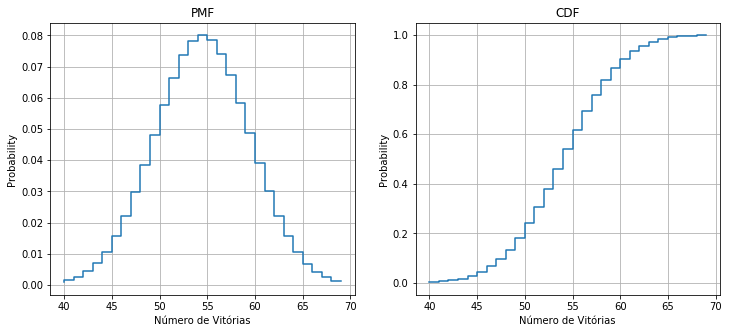

In [358]:
dist = stats.binom(100,0.55)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12,5))
x = np.arange(dist.ppf(0.001),dist.ppf(0.999))
y_pmf = dist.pmf(x)

ax[0].step(x,y_pmf)
ax[0].set_xlabel('Número de Vitórias')
ax[0].set_ylabel('Probability')
ax[0].set_title('PMF')


y_cdf = dist.cdf(x)
ax[1].step(x,y_cdf)
ax[1].set_xlabel('Número de Vitórias')
ax[1].set_ylabel('Probability')
ax[1].set_title('CDF')
ax[0].grid()
ax[1].grid()
plt.show()

In [344]:
# Caso jogue a moeda 10 vezes, qual a chance de dar 4 ou menos caras?
dist = stats.binom(10,0.50)
dist.cdf(4)

0.3769531250000001

Fortunately, it turns out that the results from a binomial expansion are fairly close to the normal curve, if the number of binomial events is large enough.   If we assume a normal curve, then all we need is the mean value and the standard deviation of the binomial distribution and we can use those results for our calculations without having to solve for every branch in the binomial expansion.

Hartshorn, Scott. Probability With The Binomial Distribution And Pascal's Triangle: A Key Idea In Statistics . Edição do Kindle. 

In [350]:
# Caso jogue a moeda 10 vezes, qual a chance de dar 4 ou menos caras?
dist = stats.binom(5,0.50)
dist.mean()

2.5

Let’s go back to the starting problem, which was “There is a candidate who has a 48% chance of getting a vote from any given voter.  What is that candidate’s chances of getting at least 500 out of 1000 votes?”

Hartshorn, Scott. Probability With The Binomial Distribution And Pascal's Triangle: A Key Idea In Statistics . Edição do Kindle. 

In [353]:
dist = stats.binom(1000,0.480)
dist.cdf(500)

0.9027460086403207

Ou seja 90.3% de chance de ter até 500

Ou, 9.7% de chance de obter 500 ou mais

In [391]:
class CoinTest(HypotesisTest):

    def test_statistic(self, data):
        heads, tails = data
        return abs(heads-tails)

    def run_model(self):
        heads, tails = self.data
        lenght = heads + tails
        simulation = np.random.choice(['H','T'],lenght)
        data = np.sum(simulation == 'H'), np.sum(simulation == 'T')
        return data

In [431]:
coin_test = CoinTest([100,130])
coin_test.p_value(100000)

0.04168

In [430]:
# Caso jogue a moeda 230 vezes, qual a chance de dar 130 caras/coroas ou mais
dist = stats.binom(230,0.50)
(1-dist.cdf(130))*2

0.04071252910009626

In [432]:
stats.chisquare([100,130])

Power_divergenceResult(statistic=3.9130434782608696, pvalue=0.04791275500844781)

# Multinomial 


``scipy.stats.multinomial.pmf(x, n, p)``

Probability mass function.

However simply using the equation is straight forward.  Let’s say you have a sack with a large number of balls.  (Large so that the probability doesn’t change as you draw balls from it).   50% of the balls are red, 30% are blue, and 20% are green. If you draw 9 balls, what are the odds that you will pull exactly 4 red ones, 3 blue ones, and 2 green ones?

Hartshorn, Scott. Probability With The Binomial Distribution And Pascal's Triangle: A Key Idea In Statistics . Edição do Kindle. 

In [359]:
dist = stats.multinomial(9,[0.5,0.3,0.2])

In [361]:
dist.pmf([4,3,2])

0.08504999999999983

Ou seja, 8.5% de ocorrer essa combinação

# Chi Squared

O teste é utilizado para testar proporções

- from scipy.stats import chisquare

stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)

Qual a chance de jogarmos dados e cair os valores 1,2,3,4,5,6 com as seguintes frequencias [8, 9, 19, 5, 8, 11] ou frenquencias mais proximas a normalidade? Chi square penaliza diferenças maiores, pois eleva cada uma delas ao quadrado.

In [367]:
from scipy import stats
stats.chisquare([8, 9, 19, 5, 8, 11])

Power_divergenceResult(statistic=11.6, pvalue=0.040699388504049985)

No caso seria 4%. No caso dos dados, todos os valores são igualmente provaveis, caso quisermos testar a probabilidade de algo ocorrer passando as frequencias devidas, também é possível.

In [373]:
from scipy import stats
stats.chisquare([5,5,5,5,5,11])

Power_divergenceResult(statistic=5.0, pvalue=0.4158801869955079)

In [372]:
from scipy import stats
stats.chisquare([7,5,7,5,7,5])

Power_divergenceResult(statistic=0.9999999999999999, pvalue=0.9625657732472964)

Exemplo, nos testes acima, é bem mais provavel que a que cada valor esteja fora da frenquencia mais comum por 1, do que um valor com um desvio muito maior que os outros. 

This example demonstrates a limitation of chi-squared tests: they indicate
that there is a difference between the two groups, but they don’t say anything
specific about what the difference is.

In [545]:
class DiceTest(HypotesisTest):
    def test_statistic(self, data):
        observed = data
        n = sum(observed)
        expected = np.ones(6) * n / 6
        test_stat = sum(abs(observed - expected))
        return test_stat

    def run_model(self):
        n = sum(self.data)
        values = [1, 2, 3, 4, 5, 6]
        rolls = np.random.choice(values, n, replace=True)
        counter = Counter(rolls)        
        return [counter[i] for i in range(1,7)]

class DiceChiTest(DiceTest):
    def test_statistic(self, data):
        observed = data
        n = sum(observed)
        expected = np.ones(6) * n / 6
        test_stat = sum((observed - expected)**2 / expected)
        return test_stat

In [546]:
values = [1, 2, 3, 4, 5, 6]
rolls = np.random.choice(values, 1000, replace=True)

In [549]:
dice = DiceChiTest([5,5,5,5,5,11])
dice_p_value = dice.p_value()
dice_p_value

0.412

In [553]:
dice = DiceChiTest([7,5,7,5,7,5])
dice_p_value = dice.p_value()
dice_p_value

0.951